Ex. 1. Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr
predeterminat de elemente din acea listă, fără repetiţie. Aplicaţi pe lista studenţilor din grupa dumneavoastră care nu
au prezentat încă o temă.

Notă: Pentru generarea unui eşantion aleator se poate apela funcţia sample din modulul random sau funcţia ran-
dom.choice cu argumentul replace=False din librăria Numpy.

In [2]:
import csv
import random

def preia_studenti_din_csv(nume_fisier):
    studenti = []
    with open(nume_fisier, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader) 
        for row in reader:
            studenti.append(row[0])  # presupunem că numele studentului este în prima coloană
    return studenti

def alege_studenti_neprezentati(studenti, numar_de_ales):
    if numar_de_ales > len(studenti):
        raise ValueError("Numărul de studenți de ales este mai mare decât numărul total de studenți.")
    return random.sample(studenti, numar_de_ales)

def main():
    nume_fisier = 'lista_studenti.csv'  # Numele fișierului CSV
    studenti = preia_studenti_din_csv(nume_fisier)
    
    numar_de_ales = 3  # Alege 3 studenți care nu au prezentat
    studenti_alesi = alege_studenti_neprezentati(studenti, numar_de_ales)
    
    print("Studenți aleși pentru prezentare:")
    for student in studenti_alesi:
        print(student)

if __name__ == "__main__":
    main()


Studenți aleși pentru prezentare:
Ema
Daniel
Maria


Ex. 2
Doi prieteni joacă următorul joc, după următoarele reguli:
Pasul 1. Primul jucător aruncă cu o monedă.
Dacă pică stemă, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală z − 3 \\$, unde z
este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul
se încheie aici.
Dacă pică ban, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 \\$. da
Pasul n. În caz că jocul nu s-a încheiat, se reia pasul 1.
Astfel, jocul se opreşte la pasul corespunzător obţinerii stemei de către primul jucător.
a) Ce fel de distribuţie urmează N, numărul de paşi ai jocului?

N urmează o distribuție geometrică, unde formula este $ P(N=n) = (1 - p)^{n-1} \cdot p $


b) Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al
doilea jucător trebuie să i-o dea primului.

In [5]:
import random

def joc(p_stema=0.5):
    N = 0  # numarul de pasi
    S = 0  # suma totala
    while True:
        N += 1
        aruncare_moneda = random.random()  # Aruncam moneda
        if aruncare_moneda < p_stema:  # Daca pica stema
            aruncare_zar = random.randint(1, 6)  # Aruncam zarul
            S += aruncare_zar - 3  # suma este z - 3
            break
        else:  # Daca pica ban
            S -= 0.5  # primul jucator ii da celui de-al doilea 0.5$
    return N, S

# Simulare pentru un joc:
N, S = joc()
print(f"Numarul de pasi N: {N}")
print(f"Suma totala S: {S} $")

Numarul de pasi N: 4
Suma totala S: -2.5 $


c) Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic
(printr-o histogramă) distribuţia acesteia.

Media lui S dupa 10000 jocuri: 0.04 $


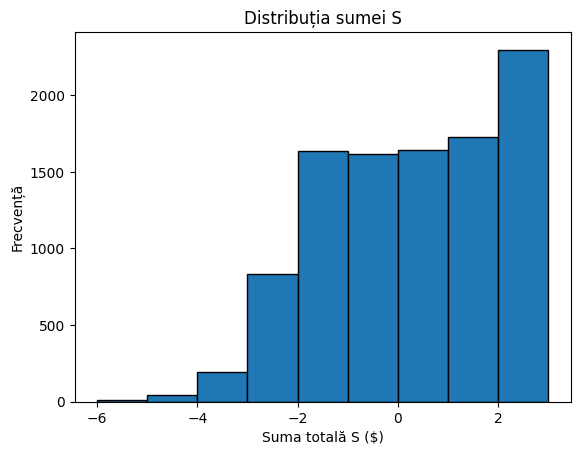

In [7]:
import random
import matplotlib.pyplot as plt

def simulare_jocuri(numar_jocuri=10000, p_stema=0.5):
    rezultate_S = []
    for _ in range(numar_jocuri):
        _, S = joc(p_stema)
        rezultate_S.append(S)
    
    # Calcularea mediei lui S
    media_S = sum(rezultate_S) / len(rezultate_S)
    print(f"Media lui S dupa {numar_jocuri} jocuri: {media_S:.2f} $")
    
    # Reprezentarea grafică a distribuției lui S
    plt.hist(rezultate_S, bins=range(int(min(rezultate_S)), int(max(rezultate_S))+1), edgecolor='black')
    plt.title("Distribuția sumei S")
    plt.xlabel("Suma totală S ($)")
    plt.ylabel("Frecvență")
    plt.show()

# Simularea a 10.000 de jocuri:
simulare_jocuri()


d) Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct. c) cu o probabilitate de apariţie a stemei
p = 0.3, respectiv p = 0.7.

Simulare pentru p = 0.3:
Media lui S dupa 10000 jocuri: -0.67 $


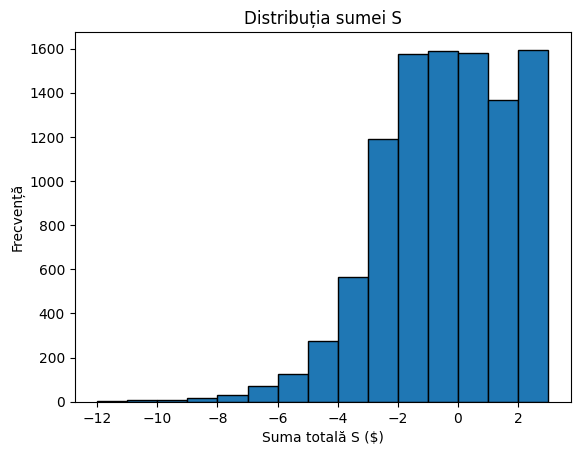

Simulare pentru p = 0.7:
Media lui S dupa 10000 jocuri: 0.29 $


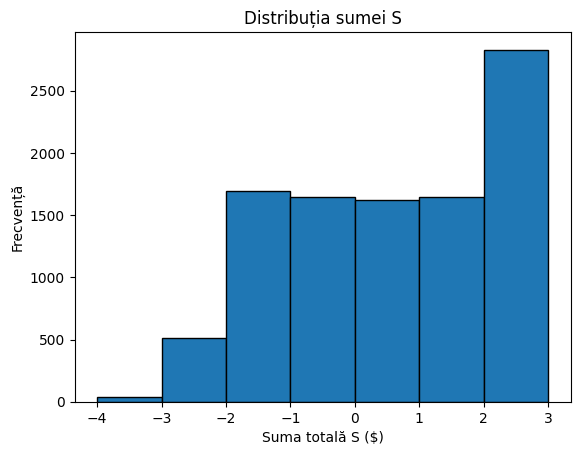

In [9]:
# Simularea pentru p = 0.3
print("Simulare pentru p = 0.3:")
simulare_jocuri(p_stema=0.3)

# Simularea pentru p = 0.7
print("Simulare pentru p = 0.7:")
simulare_jocuri(p_stema=0.7)


Ex. 3. Într-o frizerie, trei frizeri îşi tund clienţii cu următoarele viteze medii: primul cu 3 clienţi pe oră, al doilea cu 6 pe
oră iar al treilea cu 4 pe oră. Astfel, timpul de servire al unui client este modelat de distribuţii exponenţiale cu parametrii
λ1 = 3 h−1
, λ2 = 6 h−1
, respectiv λ3 = 4 h−1

, iar probabilităţile de preluare a unui client de către un anumit frizer sunt

3/13, 6/13, respectiv 4/13 (de ce?). Fie X timpul de servire pentru un client.
Generaţi 10000 de valori pentru X, şi în felul acesta estimaţi media şi deviaţia standard a lui X. Realizaţi un grafic
aproximativ al densităţii distribuţiei lui X.
Notă: Distribuţia Exp(λ) se poate apela prin random.exponential(scale=1/λ) în Numpy, sau cu stats.expon(scale=1/λ)
în Scipy. Având în vedere că X are o distribuţie continuă, densitatea aproximativă acesteia se poate vizualiza folosind
funcţia plot_kde din librăria Arviz.

Media timpului de servire: 0.227 ore
Deviația standard a timpului de servire: 0.241 ore


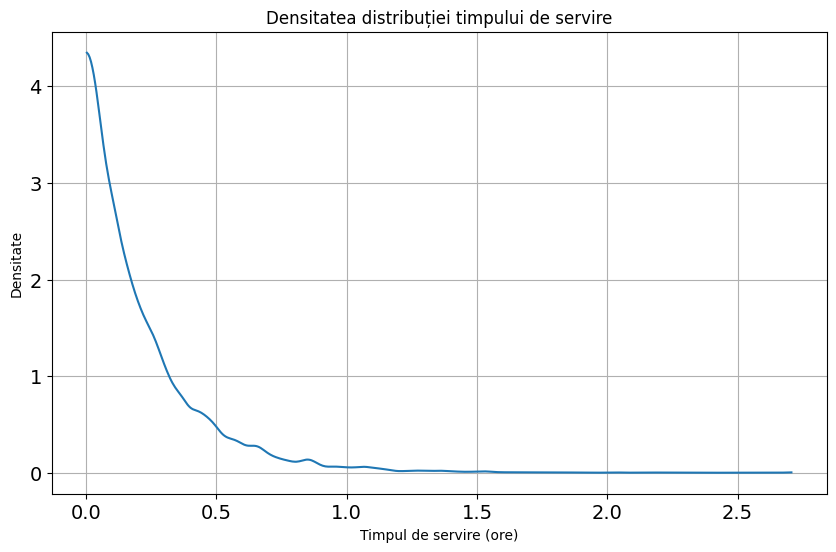

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Parametrii
lambdas = [3, 6, 4]  # parametrii λ pentru fiecare frizer
probabilitati = [3/13, 6/13, 4/13]  # probabilitățile de preluare a clienților
n_valori = 10000  # numărul de valori de generat

# Generarea valorilor pentru timpul de servire
clienti = np.random.choice(len(lambdas), size=n_valori, p=probabilitati)
timpuri_servire = np.array([np.random.exponential(scale=1/lambdas[i]) for i in clienti])

# Calcularea mediei și deviației standard
media_timp_servire = np.mean(timpuri_servire)
std_servire = np.std(timpuri_servire)

# Afișarea rezultatelor
print(f'Media timpului de servire: {media_timp_servire:.3f} ore')
print(f'Deviația standard a timpului de servire: {std_servire:.3f} ore')

# Graficul densității folosind plot_kde din ArviZ
plt.figure(figsize=(10, 6))
az.plot_kde(timpuri_servire)
plt.title("Densitatea distribuției timpului de servire")
plt.xlabel("Timpul de servire (ore)")
plt.ylabel("Densitate")
plt.grid()
plt.show()

